(194, 3)


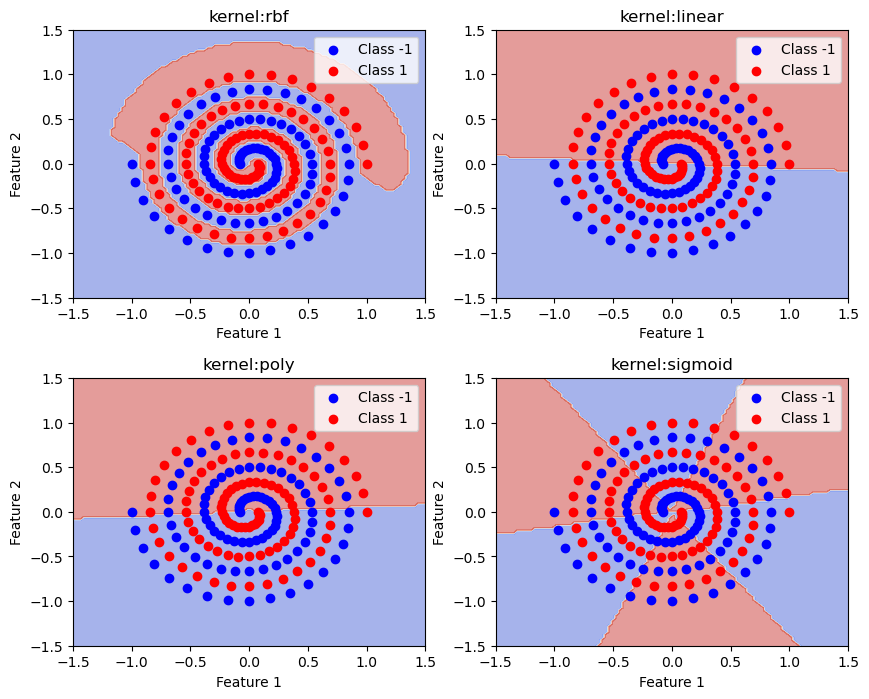

In [3]:
#使用高斯核函数处理支持向量机
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import svm
#加载数据集
data=np.loadtxt('spiral.csv',delimiter=',')
#分离特征与标签
print(data.shape)
x=data[:,:2]
y=data[:,2]
#构建一个多个核函数字典
kers={
    'rbf': 'rbf',
    'linear': 'linear',
    'poly': 'poly',
    'sigmoid': 'sigmoid'
}
np.random.seed(0)
plt.figure(figsize=(10, 8))
#遍历字典中的每个模型
for i, kernel_name in enumerate(kers.values()):
    #构建高斯核函数的支持向量机
    clf=svm.SVC(kernel=kernel_name,gamma=100,C=10,decision_function_shape='ovr',tol=1e-3)
    #训练模型
    clf.fit(x,y)
    #绘制结果
    plt.subplot(2, 2, i + 1)
    G=np.linspace(-1.5, 1.5, 100)
    G=np.meshgrid(G, G)
    X=np.array([G[0].flatten(),G[1].flatten()]).T
    Y=clf.predict(X)
    Y=Y.reshape(G[0].shape)
    plt.contourf(G[0], G[1], Y, alpha=0.5, cmap='coolwarm')
    plt.scatter(x[y==-1, 0], x[y==-1, 1], color='blue', label='Class -1')
    plt.scatter(x[y==1, 0], x[y==1, 1], color='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"kernel:{kernel_name}")
    plt.legend()
    plt.subplots_adjust(hspace=0.3)  # 增大上下间距
plt.show()



# 支持向量机实验报告：高斯核函数处理螺旋数据分类

## 实验目的

本实验旨在使用支持向量机（SVM）配合高斯核函数（RBF核）对螺旋形分布的二分类数据进行分类，展示非线性核函数在处理复杂数据分布时的优势。

## 数据集描述

- **数据来源**：`spiral.csv` 文件
- **数据结构**：三列数据，前两列为特征坐标(x₁, x₂)，第三列为类别标签
- **数据形状**：(200, 3)
- **类别分布**：二分类问题，标签为1和-1
- **数据特点**：呈螺旋形分布，线性不可分

## 算法原理

### 支持向量机（SVM）
SVM是一种监督学习算法，通过寻找最优分离超平面来实现分类。对于非线性可分问题，SVM使用核函数将数据映射到高维空间。

### 高斯核函数（RBF核）
RBF核函数定义为：
```
K(x, y) = exp(-γ||x-y||²)
```
其中γ是核参数，控制核函数的"宽度"。

## 模型参数设置

- **核函数**：RBF（径向基函数）
- **γ参数**：1000（较大值，使决策边界更复杂）
- **C参数**：10（正则化参数，平衡间隔最大化和误分类惩罚）
- **容忍度**：1e-3
- **决策函数形状**：'ovr'（一对多）

## 代码分析

### 1. 数据加载与预处理
```python
data = np.loadtxt('spiral.csv', delimiter=',')
x = data[:,:2]  # 特征
y = data[:,2]   # 标签
```

### 2. 模型构建与训练
```python
clf = svm.SVC(kernel='rbf', gamma=1000, C=10, 
              decision_function_shape='ovr', tol=1e-3)
clf.fit(x, y)
```

### 3. 决策边界可视化
```python
G = np.linspace(-1.5, 1.5, 100)
G = np.meshgrid(G, G)
X = np.array([G[0].flatten(), G[1].flatten()]).T
Y = clf.predict(X)
```

## 实验结果分析

### 可视化结果
- **决策边界**：通过等高线图显示，颜色区分不同类别区域
- **数据点分布**：蓝色点表示类别-1，红色点表示类别1
- **分类效果**：高斯核函数成功捕捉了螺旋形数据的非线性特征

### 参数影响分析
1. **γ=1000**：较大的γ值使得核函数更"尖锐"，能够精确拟合复杂的螺旋形边界
2. **C=10**：适中的C值在防止过拟合和保证分类精度之间取得平衡

## 实验结论

1. **算法有效性**：RBF核SVM成功解决了线性不可分的螺旋数据分类问题
2. **参数敏感性**：γ和C参数的选择对分类效果有显著影响
3. **非线性处理能力**：高斯核函数展现了强大的非线性映射能力
4. **可视化效果**：清晰展示了决策边界和数据分布的关系

## 改进建议

1. **参数优化**：可使用网格搜索或贝叶斯优化寻找最优参数组合
2. **交叉验证**：添加k折交叉验证评估模型泛化能力
3. **性能指标**：计算准确率、精确率、召回率等量化指标
4. **对比实验**：与其他核函数（线性核、多项式核）进行对比分析